<a href="https://colab.research.google.com/github/zhaodrago-cell/ECON5200-zilong-zhao-Applied-Data-Analytics-in-Econ-/blob/main/lab%205%20/lab%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

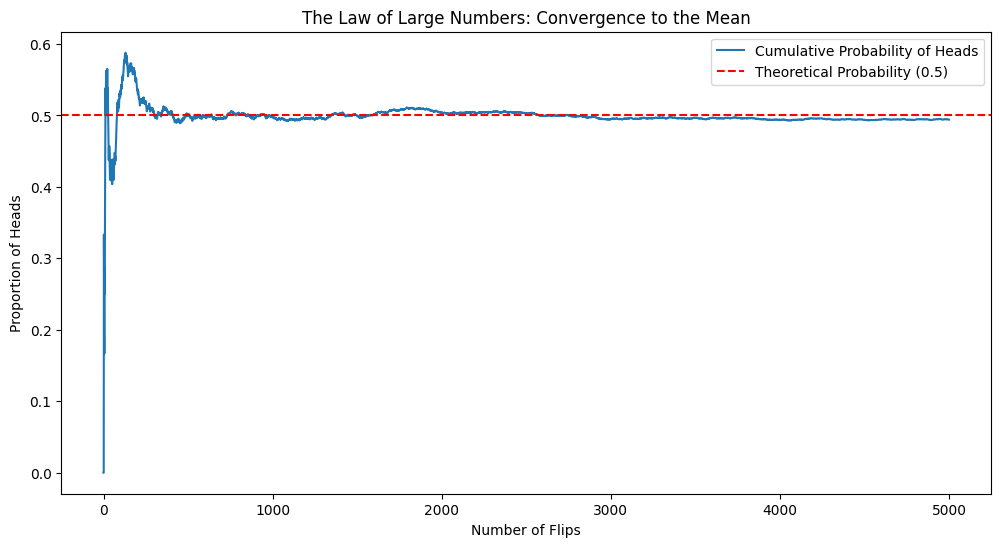

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_law_of_large_numbers(n_flips):
    # Simulate n_flips of a fair coin (0 or 1)
    flips = np.random.randint(0, 2, size=n_flips)

    # Calculate cumulative average
    # cumsum adds them up sequentially
    # Divide by range(1, n+1) to get average at each step
    cumulative_averages = np.cumsum(flips) / np.arange(1, n_flips + 1)

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_averages, label='Cumulative Probability of Heads')
    plt.axhline(0.5, color='red', linestyle='--', label='Theoretical Probability (0.5)')
    plt.title('The Law of Large Numbers: Convergence to the Mean')
    plt.xlabel('Number of Flips')
    plt.ylabel('Proportion of Heads')
    plt.legend()
    plt.show()

# Run the simulation
simulate_law_of_large_numbers(5000)

In [2]:
def monty_hall_sim(n_games):
    switch_wins = 0
    stay_wins = 0

    for _ in range(n_games):
        doors = [0, 1, 2]
        prize = np.random.choice(doors)
        choice = np.random.choice(doors)

        # Host opens a door
        # Host cannot open 'prize' and cannot open 'choice'
        openable_doors = [d for d in doors if d != prize and d != choice]
        host_opens = np.random.choice(openable_doors)

        # Strategy: Stay
        if choice == prize:
            stay_wins += 1

        # Strategy: Switch
        # The switch choice is the door that is not 'choice' and not 'host_opens'
        switch_choice = [d for d in doors if d != choice and d != host_opens]
        if switch_choice[0] == prize:
            switch_wins += 1

    print(f"Win Rate (Stay): {stay_wins/n_games:.2%}")
    print(f"Win Rate (Switch): {switch_wins/n_games:.2%}")

monty_hall_sim(10000)

Win Rate (Stay): 33.28%
Win Rate (Switch): 66.72%


Probability of Revenue Decline: 17.44%
95% Value at Risk (Worst Case): $9,613,677.02


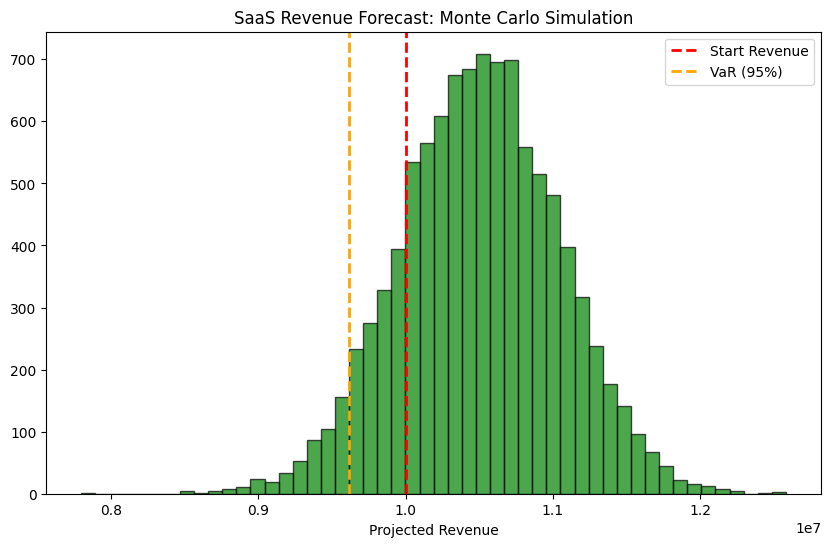

In [3]:
def saas_risk_model(n_sims):
    base_rev = 10_000_000

    # Stochastic Inputs
    # Churn is centered at 10% but can vary (Standard Deviation 2%)
    churn_sims = np.random.normal(0.10, 0.02, n_sims)
    # Sales centered at $1.5M, varies by $500k
    sales_sims = np.random.normal(1_500_000, 500_000, n_sims)

    # The Transfer Function (The Business Logic)
    net_revenue = base_rev * (1 - churn_sims) + sales_sims

    # Risk Metrics
    # Probability that we end the year with LESS money than we started
    prob_loss = np.mean(net_revenue < base_rev)

    # Value at Risk (95% Confidence)
    # We are 95% sure revenue will be ABOVE this number (the 5th percentile)
    var_95 = np.percentile(net_revenue, 5)

    print(f"Probability of Revenue Decline: {prob_loss:.2%}")
    print(f"95% Value at Risk (Worst Case): ${var_95:,.2f}")

    # Visualization
    plt.figure(figsize=(10,6))
    plt.hist(net_revenue, bins=50, alpha=0.7, color='green', edgecolor='black')
    plt.axvline(base_rev, color='red', linestyle='dashed', linewidth=2, label='Start Revenue')
    plt.axvline(var_95, color='orange', linestyle='dashed', linewidth=2, label='VaR (95%)')
    plt.title('SaaS Revenue Forecast: Monte Carlo Simulation')
    plt.xlabel('Projected Revenue')
    plt.legend()
    plt.show()

saas_risk_model(10000)

In [4]:
import numpy as np

# --- Settings (edit to match your Module C assumptions) ---
n_sims = 200_000
seed = 42
np.random.seed(seed)

# "New Sales" distribution targets (same mean/std in both models)
mu_sales = 500            # expected new sales in the year
sigma_sales = 120         # volatility of new sales

# Simple SaaS unit economics (example placeholders)
annual_contract = 12_000  # $ per new customer per year
gross_margin = 0.80
cac_per_sale = 4_000      # $ CAC per new customer
fixed_opex = 2_000_000    # $ annual fixed burn
starting_cash = 5_000_000 # $ starting cash

# --- Helper to turn sales into 1-year ending cash ---
def ending_cash(new_sales):
    unit_contribution = annual_contract * gross_margin - cac_per_sale
    return starting_cash + new_sales * unit_contribution - fixed_opex

# --- Model 1: Normal New Sales ---
sales_normal = np.random.normal(loc=mu_sales, scale=sigma_sales, size=n_sims)
sales_normal = np.clip(sales_normal, 0, None)  # avoid negative "sales"
cash_normal = ending_cash(sales_normal)

# --- Model 2: Fat-tail New Sales via Student-t(df=3) ---
df = 3
t_raw = np.random.standard_t(df=df, size=n_sims)

# standard_t(df=3) has variance = df/(df-2) = 3, so std = sqrt(3)
t_scaled = t_raw * (sigma_sales / np.sqrt(df/(df-2)))  # match sigma_sales
sales_fattail = mu_sales + t_scaled
sales_fattail = np.clip(sales_fattail, 0, None)
cash_fattail = ending_cash(sales_fattail)

# --- VaR(5%) comparison on ending cash ---
var5_normal = np.percentile(cash_normal, 5)
var5_fattail = np.percentile(cash_fattail, 5)

print(f"VaR(5%) Ending Cash - Normal:   ${var5_normal:,.0f}")
print(f"VaR(5%) Ending Cash - Fat Tail: ${var5_fattail:,.0f}")
print(f"Difference (FatTail - Normal):  ${var5_fattail - var5_normal:,.0f}")

# Optional: implied capital reserve to avoid cash < 0 at 95% confidence
reserve_normal = max(0, -var5_normal)
reserve_fattail = max(0, -var5_fattail)
print(f"Implied 95% reserve (Normal):   ${reserve_normal:,.0f}")
print(f"Implied 95% reserve (Fat Tail): ${reserve_fattail:,.0f}")


VaR(5%) Ending Cash - Normal:   $4,696,904
VaR(5%) Ending Cash - Fat Tail: $4,888,927
Difference (FatTail - Normal):  $192,023
Implied 95% reserve (Normal):   $0
Implied 95% reserve (Fat Tail): $0
